In [1]:
import matplotlib.pyplot as plt

In [139]:
import xarray as xr
goes_ds = xr.open_dataset('../../Documents/sw_cruise_sept2021/jplStarG16SSTv270_8997_d932_2101.nc')

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'sea_surface_temperature' has multiple fill values {-327.67, -327.68}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [116]:
import hvplot.xarray
import cartopy.crs as crs

In [140]:
goes_ds.sea_surface_temperature

<xarray.DataArray 'sea_surface_temperature' (time: 733, latitude: 301, longitude: 301)>
[66410533 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2021-08-15 ... 2021-09-14T13:00:00
  * latitude   (latitude) float32 38.01 37.99 37.97 37.95 ... 32.05 32.03 32.01
  * longitude  (longitude) float32 -77.99 -77.97 -77.95 ... -72.03 -72.01 -71.99
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    comment:          SST obtained by regression with buoy measurements, sens...
    grid_mapping:     crs
    ioos_category:    Temperature
    long_name:        Sea Surface Sub-Skin Temperature
    source:           NOAA
    standard_name:    sea_surface_subskin_temperature
    units:            degree_C
    valid_max:        327.67
    valid_min:        -327.67

In [147]:
goes_ds.sea_surface_temperature[:,:, :].resample(time="6H", skipna=True).mean().hvplot.quadmesh(
    'longitude', 'latitude', projection=crs.PlateCarree(), project=True,
    cmap='inferno', dynamic=True, 
    frame_height=600, clim=(25.5, 30), rasterize=True) * df.loc['2021-09-5 11:00:00':'2021-09-7 15:30:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05)

:DynamicMap   [time]
   :Overlay
      .Image.I  :Image   [longitude,latitude]   (sea_surface_temperature)
      .Points.I :Points   [lon,lat]

In [145]:
goes_ds.sea_surface_temperature[:,:, :].resample(time="1D", skipna=True).mean().hvplot.quadmesh(
    'longitude', 'latitude', projection=crs.PlateCarree(), project=True,
    cmap='inferno', dynamic=True, 
    frame_height=600, clim=(25.5, 30), rasterize=True) * df.loc['2021-09-5 11:00:00':'2021-09-7 15:30:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05)

:DynamicMap   [time]
   :Overlay
      .Image.I  :Image   [longitude,latitude]   (sea_surface_temperature)
      .Points.I :Points   [lon,lat]

In [144]:
goes_ds.sea_surface_temperature[:,:, :].hvplot.quadmesh(
    'longitude', 'latitude', projection=crs.PlateCarree(), project=True,
    cmap='inferno', dynamic=True, 
    frame_height=600, clim=(25.5, 30), rasterize=True) * df.loc['2021-09-5 11:00:00':'2021-09-7 15:30:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05)

:DynamicMap   [time]
   :Overlay
      .Image.I  :Image   [longitude,latitude]   (sea_surface_temperature)
      .Points.I :Points   [lon,lat]

<GeoAxesSubplot:title={'center':'time = 2021-08-19T04:00:00'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>

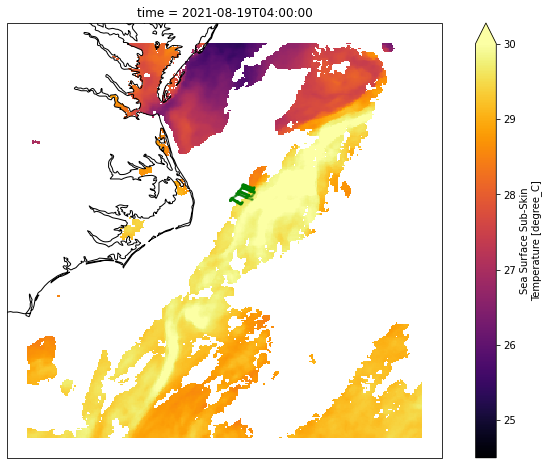

In [143]:
import matplotlib.pyplot as plt
import cartopy.crs as crs

fig, ax = plt.subplots(figsize=(12,8), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')
goes_ds.sea_surface_temperature[100,:, :].plot(ax=ax, vmin=24.5, vmax=30, cmap='inferno')
gdf.loc['2021-09-5 11:00:00':'2021-09-7 15:30:00'].plot(ax=ax, markersize=2, color='green', alpha=.05)
# fig.savefig('sst_sept0523_studypoints.png',dpi=400)

In [123]:
m

.quadmesh(
    'longitude', 'latitude', projection=crs.PlateCarree(), project=True,
    cmap='inferno', dynamic=True, 
    frame_height=600, clim=(25.5, 30), rasterize=True) * df.loc['2021-09-5 11:00:00':'2021-09-7 15:30:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05)

:DynamicMap   []
   :Overlay
      .Image.I  :Image   [longitude,latitude]   (sea_surface_temperature)
      .Points.I :Points   [lon,lat]

In [168]:
! mkdir tmp_imgs

In [151]:
goes_ds.sea_surface_temperature[400:,:, :]

<xarray.DataArray 'sea_surface_temperature' (time: 333, latitude: 301, longitude: 301)>
[30170133 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2021-08-31T16:00:00 ... 2021-09-14T13:00:00
  * latitude   (latitude) float32 38.01 37.99 37.97 37.95 ... 32.05 32.03 32.01
  * longitude  (longitude) float32 -77.99 -77.97 -77.95 ... -72.03 -72.01 -71.99
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    comment:          SST obtained by regression with buoy measurements, sens...
    grid_mapping:     crs
    ioos_category:    Temperature
    long_name:        Sea Surface Sub-Skin Temperature
    source:           NOAA
    standard_name:    sea_surface_subskin_temperature
    units:            degree_C
    valid_max:        327.67
    valid_min:        -327.67

In [152]:
400, goes_ds.time.shape[0]

(400, 733)

In [ ]:
goes_6h = goes_ds.sea_surface_temperature[400:,:, :].resample(time="6H", skipna=True).median()


In [158]:
plt.rcParams.update({'font.size': 16})

In [163]:
for i in range(38, goes_6h.shape[0]):
    fig,ax = plt.subplots(figsize=(11,9),subplot_kw=dict(projection=crs.PlateCarree()))
    goes_6h[i,:, :].plot(ax=ax, vmin=25,vmax=30,cmap='inferno' )
    ax.coastlines(resolution='10m')
    #ax.plot([281.5, 285.5], [31, 35], color='grey',linestyle='--')
    #for i, row in gdf[gdf.date==current_date].iterrows():
        #for each one that exists now, find all that match its eddy_id, then run through each pair and plot it
        #ax.scatter(row.lon, row.lat, color='black')
    gdf.loc['2021-09-5 11:00:00':'2021-09-7 15:30:00'].plot(ax=ax, cmap='viridis', alpha=0.02, markersize=20)
    plt.savefig(f"tmp_imgs/sst_goes_longer_{i:04}.png")
    plt.close()

In [12]:
import pandas as pd
import glob

path = '../../Documents/sw_cruise_sept2021/inlinino_logs/wscd859/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df_tmp = pd.read_csv(filename, index_col=None, header=1)
    li.append(df_tmp)
frame = pd.concat(li, axis=0, ignore_index=True)

In [14]:
frame['utc_dt'] = pd.to_datetime(frame['yyyy/mm/dd HH:MM:SS.fff'])

In [78]:
cdom_df = frame
cdom_df = cdom_df.set_index('utc_dt')

In [29]:
import pandas as pd
import hvplot.pandas  # noqa
from datetime import timedelta


df = pd.read_csv("../../Documents/sw_cruise_sept2021/Data every 1 min_001.elg")
df.head()

Date      Time  SW-ZDA-Year  SW-ZDA-Month  SW-ZDA-Day  SW-ZDA-Time  \
0  09/04/2021  22:57:59         2021             9           4    230119.69   
1  09/04/2021  22:58:59         2021             9           4    230220.00   
2  09/04/2021  22:59:59         2021             9           4    230319.70   
3  09/04/2021  23:00:59         2021             9           4    230420.70   
4  09/04/2021  23:01:59         2021             9           4    230520.70   

   SW-GGA-Lat SW-GGA-NorS  SW-GGA-Long SW-GGA-EorW  ...  \
0   3438.0721           N    7639.5131           W  ...   
1   3437.7653           N    7639.3397           W  ...   
2   3437.4662           N    7639.1743           W  ...   
3   3437.1706           N    7639.0156           W  ...   
4   3436.8780           N    7638.8561           W  ...   

   SW-Weather-HumidRel-%  SW-Wind-WindSpeedRel  SW-Wind-WindAngleRel  \
0                   62.1                 23.70                346.29   
1                   62.6                 23.70                347.29   
2                   62.0                 19.98                344.39   
3                   63.8                 23.09                346.09   
4                   63.5                 23.38                348.79   

   TrueWind-DRV-SPEED  TrueWind-DRV-DIRECTION  TSG--temp-SBE38  TSG--sal  \
0                3.65                  137.98          26.5469   36.0464   
1                0.92                  120.30          26.5202   35.9130   
2                1.74                  100.41          26.7050   35.9890   
3                4.72                  123.35          26.7135   36.0296   
4                4.31                  152.50          26.8741   36.0758   

   SW-Depth-DBT-Depth below transducer (m)  DepthOverall-DRV-VALUE  \
0                                    15.57                   16.57   
1                                    16.51                   17.51   
2                                    16.34                   17.34   
3                                    16.23                   17.23   
4                                    16.52                   17.52   

   Unnamed: 24  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 25 columns]

In [30]:
len(df)

6542

In [58]:
df['SW-ZDA-Time']

0       230119.69
1       230220.00
2       230319.70
3       230420.70
4       230520.70
          ...    
6537    115919.70
6538    120019.70
6539    120119.70
6540    120219.70
6541    120317.69
Name: SW-ZDA-Time, Length: 6542, dtype: float64

In [ ]:
This first one is the right way to do this

In [ ]:
from datetime import datetime

date_time_strs = df['SW-ZDA-Year'].astype('str') + ' ' + df['SW-ZDA-Month'].astype('str') + ' ' + df['SW-ZDA-Day'].astype('str') + ' ' + df['SW-ZDA-Time'].astype('str').str[:-2].str.replace('.','')

df['datetime'] = [datetime.strptime(x, '%Y %m %d %H%M%S') for x in date_time_strs]
df['utc_dt'] = df['datetime']
df  = df.set_index('utc_dt')

In [67]:
from datetime import datetime

date_time_strs = df['Date'] + ' ' + df['Time']

df['datetime'] = [datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in date_time_strs]
df['utc_dt'] = df['datetime']+ timedelta(minutes=4)
df  = df.set_index('utc_dt')

In [68]:
import numpy as np

def dms2dd(degrees, minutes, seconds, direction):
    dd = degrees + minutes/60 + seconds/(60*60);
    if direction == 'W' or direction == 'S':
        dd *= -1
    return dd;

df['lon'] = dms2dd(pd.to_numeric(df['SW-GGA-Long'].astype(str).str[:2]).astype(float), pd.to_numeric(df['SW-GGA-Long'].astype(str).str[2:]),np.array(0), 'W')
df['lat'] = dms2dd(pd.to_numeric(df['SW-GGA-Lat'].astype(str).str[:2]).astype(float), pd.to_numeric(df['SW-GGA-Lat'].astype(str).str[2:]),np.array(0), 'E')

<AxesSubplot:>

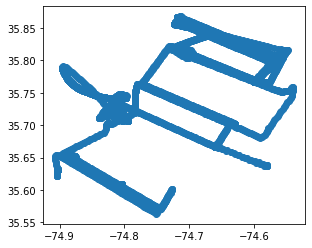

In [69]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf.loc['2021-09-5 11:00:00':'2021-09-8 20:45:00'].plot()

In [23]:
# gdf.reset_index().drop(columns=['datetime', 'utc_dt']).to_file('compass_cruise.shp')

In [24]:
df.hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

In [25]:
df.loc['2021-09-5 11:00:00':'2021-09-7 15:30:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

In [83]:
cdom_df.loc['2021-09-5 11:00:00':'2021-09-7 15:30:00'].columns

<ipython-input-83-9b3005f1a041>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-5 11:00:00':'2021-09-7 15:30:00'].columns


Index(['yyyy/mm/dd HH:MM:SS.fff', ' V'], dtype='object')

<ipython-input-91-df14b368788f>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-5 11:00:00':'2021-09-9 18:30:00'].rolling(window=60).mean().plot(y=' V', ax=ax)


(0.05, 0.5)

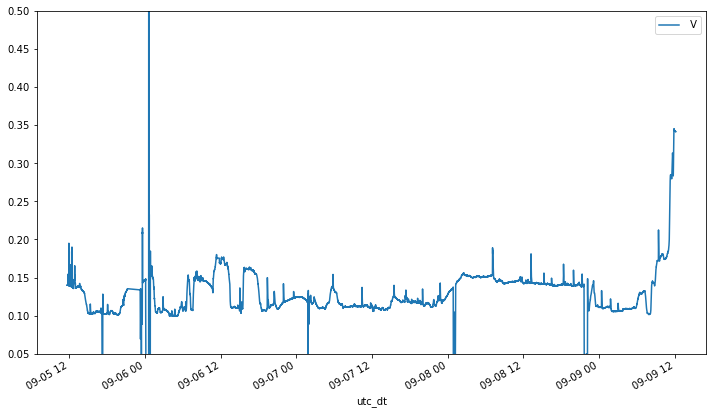

In [91]:
fig,ax = plt.subplots(figsize=(12,7))
cdom_df.loc['2021-09-5 11:00:00':'2021-09-9 18:30:00'].rolling(window=60).mean().plot(y=' V', ax=ax)
ax.set_ylim(0.05,.5)


In [46]:
cdom_df['bin_cdom']= cdom_df.rolling(window=120*2).mean().cdom_volts

<AxesSubplot:xlabel='utc_dt'>

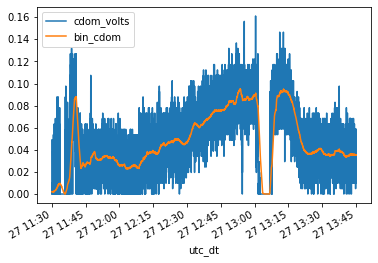

In [47]:
cdom_df.loc['2021-08-27 11:30:00':'2021-08-27 13:45:00'].plot()

In [29]:
df.loc['2021-09-5 13:00:00':'2021-09-5 17:30:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

In [38]:
plt.rcParams.update({'font.size': 18})

<ipython-input-98-20e040147c3a>:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-5 13:00:00':'2021-09-5 17:30:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')


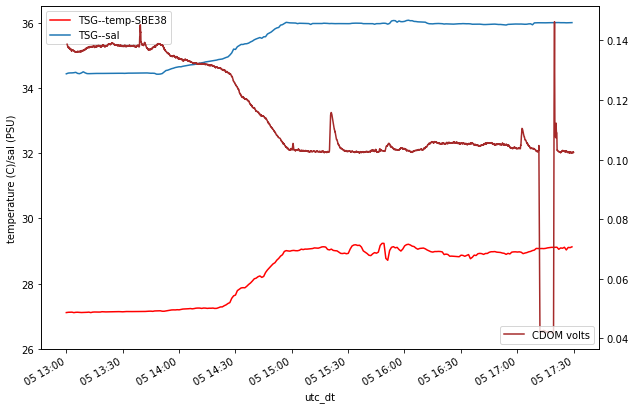

In [98]:
fig, ax = plt.subplots(figsize=(10,7))
df.loc['2021-09-5 13:00:00':'2021-09-5 17:30:00'].plot(y='TSG--temp-SBE38',ax=ax, color='red')
df.loc['2021-09-5 13:00:00':'2021-09-5 17:30:00'].plot(y='TSG--sal',ax=ax)

ax.set_ylim(26, 36.5)
ax.set_ylabel('temperature (C)/sal (PSU)')
ax.legend(loc='upper left')
ax2 = ax.twinx()
cdom_df.loc['2021-09-5 13:00:00':'2021-09-5 17:30:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')
ax2.legend(loc='lower right')


# fig.savefig('transect1_s_t.png')

In [48]:
df.loc['2021-09-5 18:15:00':'2021-09-5 20:30:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

<ipython-input-101-dfeddf3df90c>:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-5 18:15:00':'2021-09-5 20:30:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')


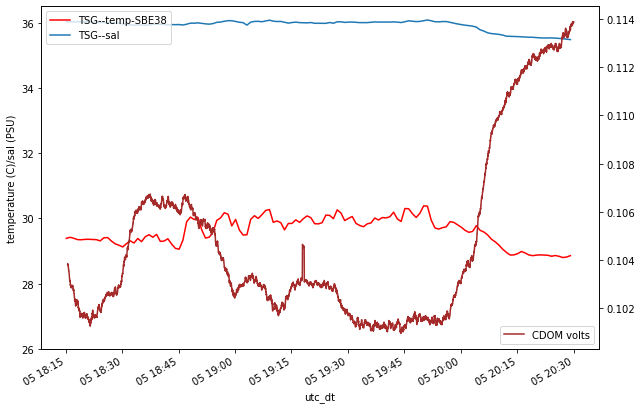

In [101]:
fig, ax = plt.subplots(figsize=(10,7))
df.loc['2021-09-5 18:15:00':'2021-09-5 20:30:00'].plot(y='TSG--temp-SBE38',ax=ax, color='red')
df.loc['2021-09-5 18:15:00':'2021-09-5 20:30:00'].plot(y='TSG--sal',ax=ax)


ax.set_ylim(26, 36.5)
ax.set_ylabel('temperature (C)/sal (PSU)')
ax.legend(loc='upper left')
ax2 = ax.twinx()
cdom_df.loc['2021-09-5 18:15:00':'2021-09-5 20:30:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')
ax2.legend(loc='lower right')


# fig.savefig('transect2_s_t.png')

In [63]:
df.loc['2021-09-6 1:00:00':'2021-09-6 4:00:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

<ipython-input-102-9c0a578ddb76>:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-6 1:00:00':'2021-09-6 4:00:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')


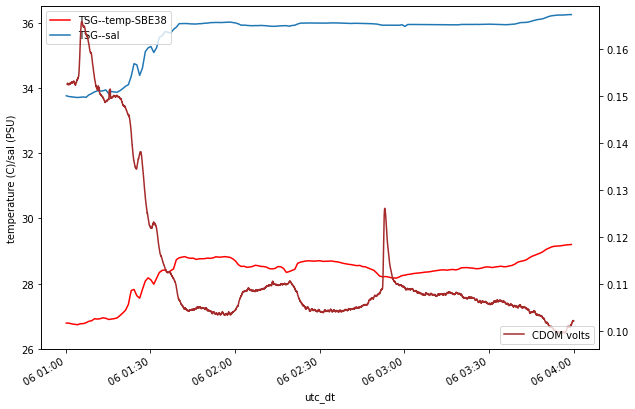

In [102]:
fig, ax = plt.subplots(figsize=(10,7))
df.loc['2021-09-6 1:00:00':'2021-09-6 4:00:00'].plot(y='TSG--temp-SBE38',ax=ax, color='red')
df.loc['2021-09-6 1:00:00':'2021-09-6 4:00:00'].plot(y='TSG--sal',ax=ax)


ax.set_ylim(26, 36.5)
ax.set_ylabel('temperature (C)/sal (PSU)')
ax.legend(loc='upper left')
ax2 = ax.twinx()
cdom_df.loc['2021-09-6 1:00:00':'2021-09-6 4:00:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')
ax2.legend(loc='lower right')

# fig.savefig('transect3_s_t.png')

In [85]:
df.loc['2021-09-6 5:10:00':'2021-09-6 6:45:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

<ipython-input-103-6e0a549c215d>:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-6 5:10:00':'2021-09-6 6:45:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')


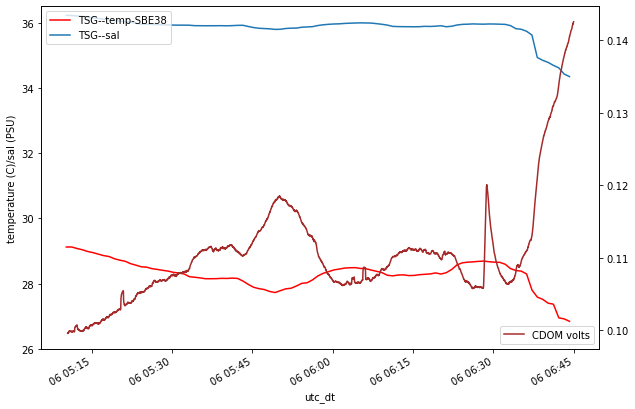

In [103]:
fig, ax = plt.subplots(figsize=(10,7))
df.loc['2021-09-6 5:10:00':'2021-09-6 6:45:00'].plot(y='TSG--temp-SBE38',ax=ax, color='red')
df.loc['2021-09-6 5:10:00':'2021-09-6 6:45:00'].plot(y='TSG--sal',ax=ax)

ax.set_ylim(26, 36.5)
ax.set_ylabel('temperature (C)/sal (PSU)')
ax.legend(loc='upper left')
ax2 = ax.twinx()
cdom_df.loc['2021-09-6 5:10:00':'2021-09-6 6:45:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')
ax2.legend(loc='lower right')

# fig.savefig('transect4_s_t.png')

In [91]:
df.loc['2021-09-6 12:30:00':'2021-09-6 15:00:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

<ipython-input-104-857f38760a5d>:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-6 12:30:00':'2021-09-6 15:00:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')


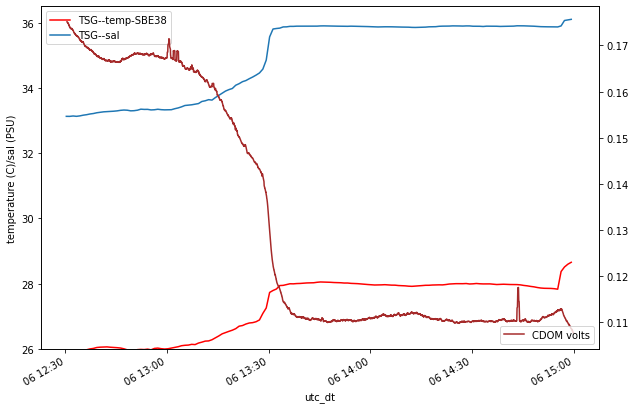

In [104]:
fig, ax = plt.subplots(figsize=(10,7))
df.loc['2021-09-6 12:30:00':'2021-09-6 15:00:00'].plot(y='TSG--temp-SBE38',ax=ax, color='red')
df.loc['2021-09-6 12:30:00':'2021-09-6 15:00:00'].plot(y='TSG--sal',ax=ax)

ax.set_ylim(26, 36.5)
ax.set_ylabel('temperature (C)/sal (PSU)')
ax.legend(loc='upper left')
ax2 = ax.twinx()
cdom_df.loc['2021-09-6 12:30:00':'2021-09-6 15:00:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')
ax2.legend(loc='lower right')

# fig.savefig('transect5_s_t.png')

In [97]:
df.loc['2021-09-6 16:45:00':'2021-09-6 19:20:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

<ipython-input-105-c2e781669e3c>:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-6 16:45:00':'2021-09-6 19:20:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')


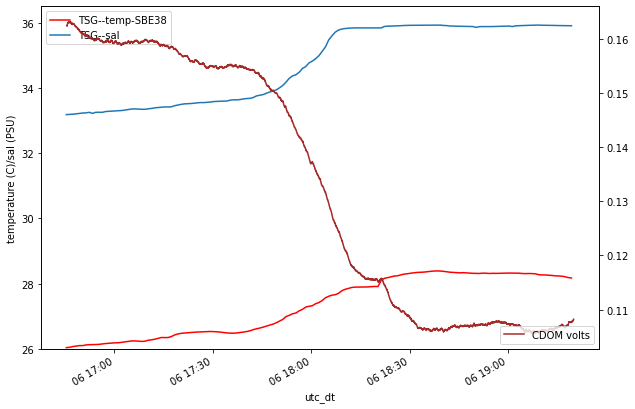

In [105]:
fig, ax = plt.subplots(figsize=(10,7))
df.loc['2021-09-6 16:45:00':'2021-09-6 19:20:00'].plot(y='TSG--temp-SBE38',ax=ax, color='red')
df.loc['2021-09-6 16:45:00':'2021-09-6 19:20:00'].plot(y='TSG--sal',ax=ax)

ax.set_ylim(26, 36.5)
ax.set_ylabel('temperature (C)/sal (PSU)')
ax.legend(loc='upper left')
ax2 = ax.twinx()
cdom_df.loc['2021-09-6 16:45:00':'2021-09-6 19:20:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')
ax2.legend(loc='lower right')

# fig.savefig('transect6_s_t.png')

In [135]:
df.loc['2021-09-7 2:55:00':'2021-09-7 5:35:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

<ipython-input-108-3a06032c48e3>:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-7 2:55:00':'2021-09-7 5:35:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')


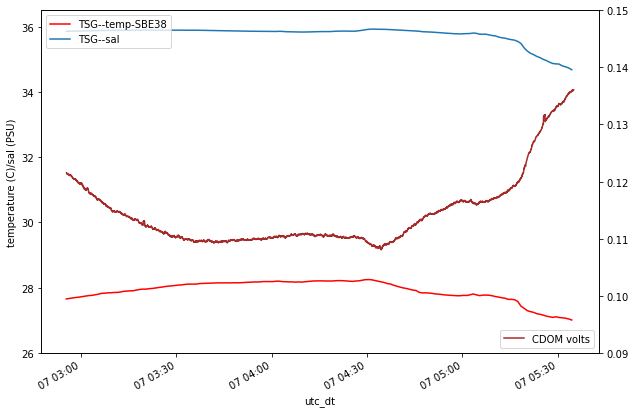

In [108]:
fig, ax = plt.subplots(figsize=(10,7))
df.loc['2021-09-7 2:55:00':'2021-09-7 5:35:00'].plot(y='TSG--temp-SBE38',ax=ax, color='red')
df.loc['2021-09-7 2:55:00':'2021-09-7 5:35:00'].plot(y='TSG--sal',ax=ax)

ax.set_ylim(26, 36.5)
ax.set_ylabel('temperature (C)/sal (PSU)')
ax.legend(loc='upper left')
ax2 = ax.twinx()
ax2.set_ylim(0.09, .15)
cdom_df.loc['2021-09-7 2:55:00':'2021-09-7 5:35:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')
ax2.legend(loc='lower right')

# fig.savefig('transect7_s_t.png')

In [145]:
df.loc['2021-09-7 6:45:00':'2021-09-7 9:00:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

<ipython-input-109-98203d524c27>:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-7 6:45:00':'2021-09-7 9:00:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')


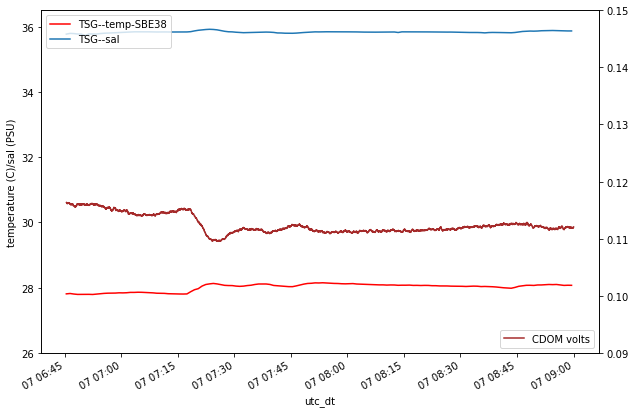

In [109]:
fig, ax = plt.subplots(figsize=(10,7))
df.loc['2021-09-7 6:45:00':'2021-09-7 9:00:00'].plot(y='TSG--temp-SBE38',ax=ax, color='red')
df.loc['2021-09-7 6:45:00':'2021-09-7 9:00:00'].plot(y='TSG--sal',ax=ax)

ax.set_ylim(26, 36.5)
ax.set_ylabel('temperature (C)/sal (PSU)')
ax.legend(loc='upper left')
ax2 = ax.twinx()
ax2.set_ylim(0.09, .15)
cdom_df.loc['2021-09-7 6:45:00':'2021-09-7 9:00:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')
ax2.legend(loc='lower right')

# fig.savefig('transect8_s_t.png')

In [104]:
df.loc['2021-09-7 12:10:00':'2021-09-7 15:30:00'].hvplot.points('lon', 'lat', geo=True, color='red', alpha=0.05,tiles='EsriNatGeo')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]

<ipython-input-114-0c1f0262e0c3>:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cdom_df.loc['2021-09-7 12:10:00':'2021-09-7 15:25:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')


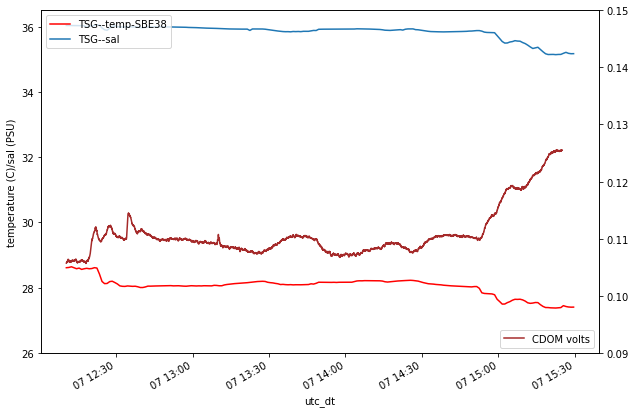

In [114]:
fig, ax = plt.subplots(figsize=(10,7))
df.loc['2021-09-7 12:10:00':'2021-09-7 15:30:00'].plot(y='TSG--temp-SBE38',ax=ax, color='red')
df.loc['2021-09-7 12:10:00':'2021-09-7 15:30:00'].plot(y='TSG--sal',ax=ax)

ax.set_ylim(26, 36.5)
ax.set_ylabel('temperature (C)/sal (PSU)')
ax.legend(loc='upper left')
ax2 = ax.twinx()
ax2.set_ylim(0.09, .15)
cdom_df.loc['2021-09-7 12:10:00':'2021-09-7 15:25:00'].rolling(window=30).mean().plot(y=' V', ax=ax2, color='brown', label='CDOM volts')
ax2.legend(loc='lower right')

# fig.savefig('transect9_s_t.png')

(0.0, 0.4)

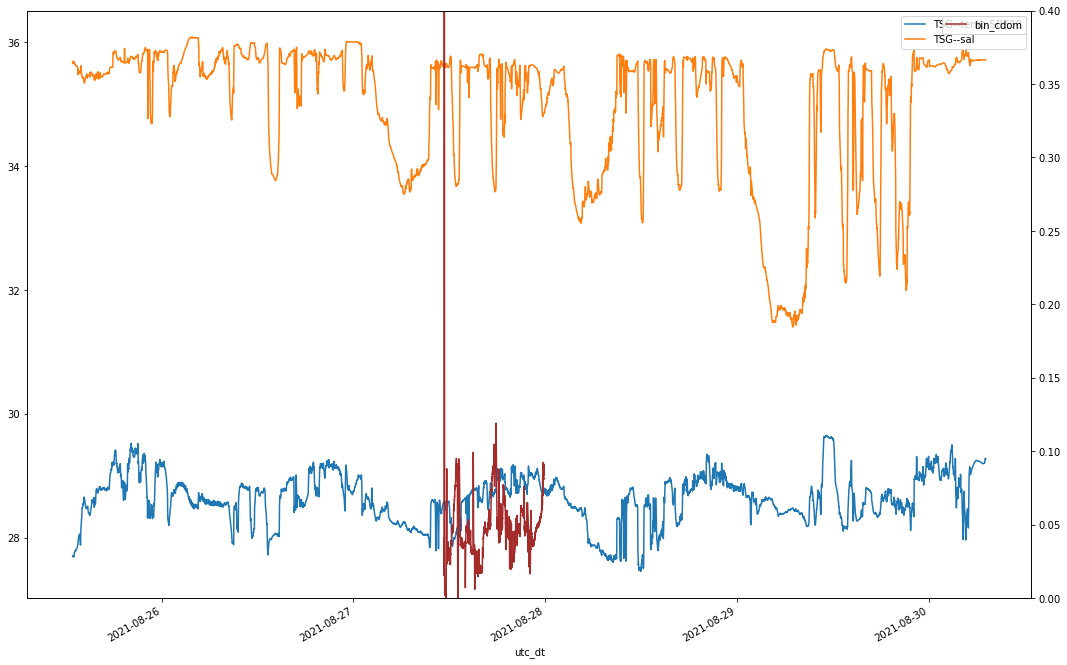

In [48]:
fig, ax = plt.subplots(figsize=(18,12))
df.plot(y='TSG--temp-SBE38',ax=ax)
df.plot(y='TSG--sal',ax=ax)
ax2 = ax.twinx()
cdom_df.plot(y='bin_cdom', ax=ax2, color='brown')
ax2.set_ylim(0, .4)

In [49]:
df_transect = df.loc['2021-08-27 13:00:00':'2021-08-27 14:30:00']
cdom_df_transect = cdom_df.loc['2021-08-27 13:00:00':'2021-08-27 14:30:00']

In [50]:
# df_transect = df.loc['2021-08-29 11:00:00':'2021-08-29 13:30:00']
# cdom_df_transect = cdom_df.loc['2021-08-29 11:00:00':'2021-08-29 13:30:00']

<AxesSubplot:xlabel='utc_dt'>

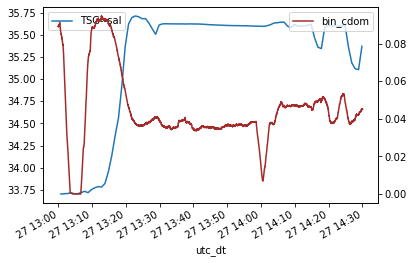

In [51]:
fig, ax = plt.subplots()
# df_transect.plot(y='TSG--temp-SBE38',ax=ax)
df_transect.plot(y='TSG--sal',ax=ax)
ax2 = ax.twinx()
cdom_df_transect.plot(y='bin_cdom', ax=ax2, color='brown')

### Radiometer Data

In [52]:
trios_df = pd.read_csv('data/trios/shearwater_trios_20210827.csv')

In [53]:
trios_df['datetime'] = pd.to_datetime(trios_df['TimeStamp'])
trios_df['utc_dt'] =trios_df['datetime'] + timedelta(hours=4)
trios_df = trios_df.set_index('utc_dt')

In [60]:
df_transect = df.loc['2021-08-27 16:15:00':'2021-08-27 17:30:00']
cdom_df_transect = cdom_df.loc['2021-08-27 16:15:00':'2021-08-27 17:30:00']
trios_df_transect = trios_df.loc['2021-08-27 16:15:00':'2021-08-27 17:30:00']

<AxesSubplot:xlabel='utc_dt'>

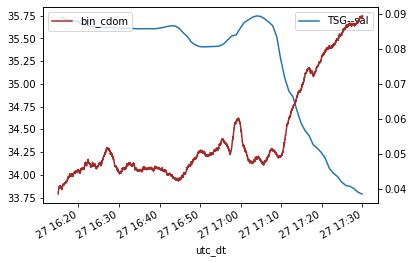

In [61]:
fig, ax = plt.subplots()
# df_transect.plot(y='TSG--temp-SBE38',ax=ax)
df_transect.plot(y='TSG--sal',ax=ax)
ax2 = ax.twinx()
cdom_df_transect.plot(y='bin_cdom', ax=ax2, color='brown')

In [290]:
chlci_transect = oc_index(trios_df_transect.iloc[:, 156:161].mean(axis=1).values, trios_df_transect.iloc[:, 232:240].mean(axis=1).values, trios_df_transect.iloc[:, 346:351].mean(axis=1).values)

In [292]:
trios_df_transect['chl'] = chlci_transect

<ipython-input-292-8c3f1fbbe830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trios_df_transect['chl'] = chlci_transect


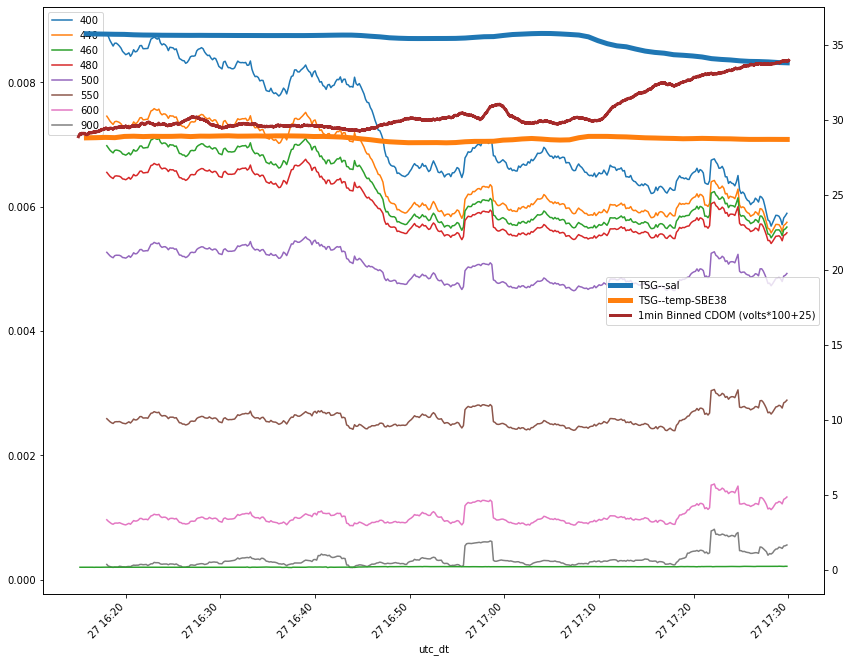

In [293]:
fig, ax = plt.subplots(figsize=(14,12))

ax2 = ax.twinx()

df_transect.plot(y='TSG--sal',ax=ax2, linewidth=5)
df_transect.plot(y='TSG--temp-SBE38',ax=ax2, linewidth=5)
(cdom_df_transect.bin_cdom*100+25).plot(color='brown', ax=ax2, linewidth=3, label='1min Binned CDOM (volts*100+25)')
ax2.legend()

trios_df_transect['400'].rolling(window=6*3).mean().plot(ax=ax)
trios_df_transect['440'].rolling(window=6*3).mean().plot(ax=ax)
trios_df_transect['460'].rolling(window=6*3).mean().plot(ax=ax)
trios_df_transect['480'].rolling(window=6*3).mean().plot(ax=ax)
trios_df_transect['500'].rolling(window=6*3).mean().plot(ax=ax)
trios_df_transect['550'].rolling(window=6*3).mean().plot(ax=ax)
trios_df_transect['600'].rolling(window=6*3).mean().plot(ax=ax)
trios_df_transect['900'].rolling(window=6*3).mean().plot(ax=ax)

# trios_gdf.loc['2021-08-27 16:15:00':'2021-08-27 17:30:00'].plot('chl', ax=ax)

ax.legend(loc='upper left')


# ax.set_ylim(0.000,0.012)
fig.autofmt_xdate(rotation=45)
# fig.savefig('sal_temp_cdom_radiometry.png')

In [299]:
plt.rcParams.update({'font.size': 16})

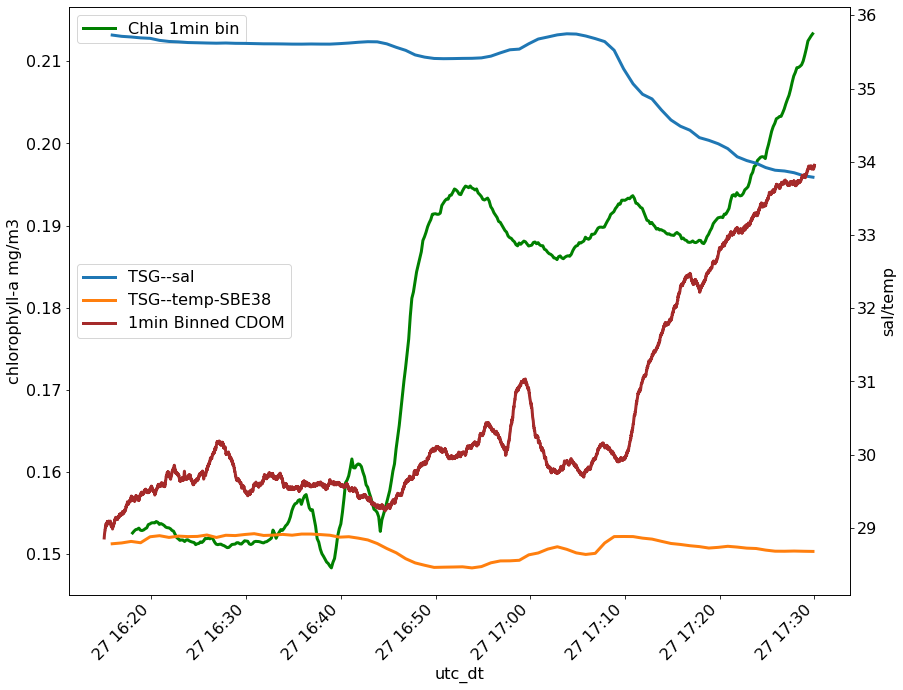

In [302]:
fig, ax = plt.subplots(figsize=(14,12))

ax2 = ax.twinx()

df_transect.plot(y='TSG--sal',ax=ax2, linewidth=3)
df_transect.plot(y='TSG--temp-SBE38',ax=ax2, linewidth=3)
(cdom_df_transect.bin_cdom*100+25).plot(color='brown', ax=ax2, linewidth=3, label='1min Binned CDOM')
ax2.legend()


trios_df_transect['chl'].rolling(window=6*3).mean().plot(ax=ax, color='green', label='Chla 1min bin', linewidth=3)

# trios_gdf.loc['2021-08-27 16:15:00':'2021-08-27 17:30:00'].plot('chl', ax=ax)

ax.legend(loc='upper left')
ax.set_ylabel('chlorophyll-a mg/m3')
ax2.set_ylabel('sal/temp')


# ax.set_ylim(0.000,0.012)
fig.autofmt_xdate(rotation=45)
fig.savefig('sal_temp_cdom_chla.png')

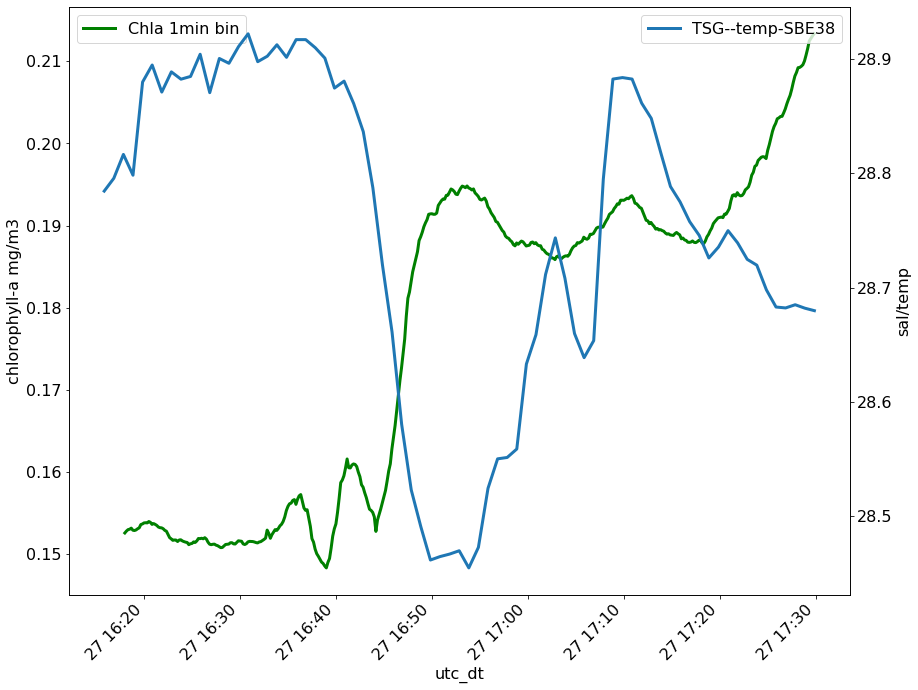

In [407]:
fig, ax = plt.subplots(figsize=(14,12))

ax2 = ax.twinx()

# df_transect.plot(y='TSG--sal',ax=ax2, linewidth=3)
df_transect.plot(y='TSG--temp-SBE38',ax=ax2, linewidth=3)
# (cdom_df_transect.bin_cdom*100+25).plot(color='brown', ax=ax2, linewidth=3, label='1min Binned CDOM')
ax2.legend()


trios_df_transect['chl'].rolling(window=6*3).mean().plot(ax=ax, color='green', label='Chla 1min bin', linewidth=3)

# trios_gdf.loc['2021-08-27 16:15:00':'2021-08-27 17:30:00'].plot('chl', ax=ax)

ax.legend(loc='upper left')
ax.set_ylabel('chlorophyll-a mg/m3')
ax2.set_ylabel('sal/temp')


# ax.set_ylim(0.000,0.012)
fig.autofmt_xdate(rotation=45)
# fig.savefig('sal_temp_cdom_chla.png')

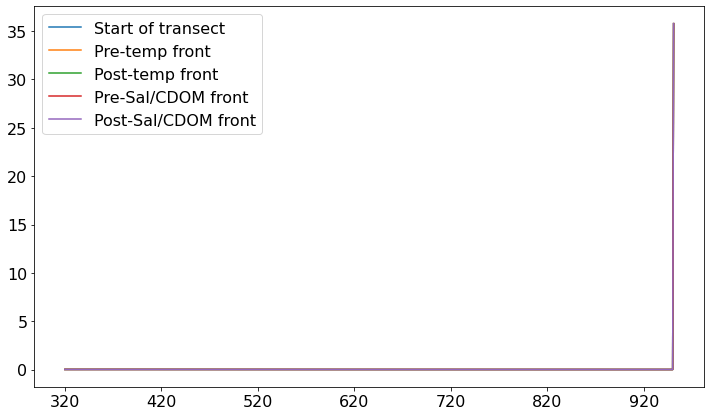

In [427]:
fig,ax = plt.subplots(figsize=(12,7))
trios_df_transect.loc['2021-08-27 16:15:00':'2021-08-27 16:20:00'].median(numeric_only=True).iloc[:-2].plot(label='Start of transect')

trios_df_transect.loc['2021-08-27 16:37:00':'2021-08-27 16:43:00'].median(numeric_only=True).iloc[:-2].plot(label='Pre-temp front')
trios_df_transect.loc['2021-08-27 16:48:00':'2021-08-27 16:53:00'].median(numeric_only=True).iloc[:-2].plot(label='Post-temp front')
trios_df_transect.loc['2021-08-27 17:02:00':'2021-08-27 17:08:00'].median(numeric_only=True).iloc[:-2].plot(label='Pre-Sal/CDOM front')
trios_df_transect.loc['2021-08-27 17:23:00':'2021-08-27 17:38:00'].median(numeric_only=True).iloc[:-2].plot(label='Post-Sal/CDOM front')

ax.legend()
# plt.savefig('radiometry_spectra.png')


<AxesSubplot:>

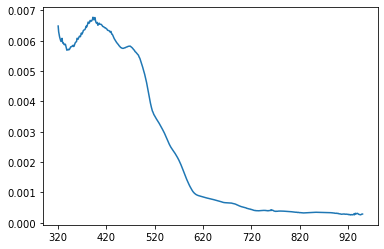

In [155]:
lats = []
lons = []
for i in range(len(trios_df)):
    row = df.iloc[df.index.get_loc(pd.to_datetime(trios_df.iloc[i].TimeStamp) + timedelta(hours=4), method='nearest')]
    lats.append(row.lat)
    lons.append(row.lon)

In [156]:
trios_df['lat'] = lats
trios_df['lon'] = lons

In [157]:
import geopandas as gpd

trios_gdf = gpd.GeoDataFrame(
    trios_df, geometry=gpd.points_from_xy(trios_df.lon, trios_df.lat))

<AxesSubplot:>

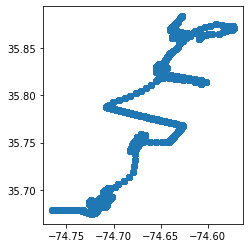

In [158]:
trios_gdf.plot()

In [166]:
trios_gdf.columns[1:-4]

Index(['320', '321', '322', '323', '324', '325', '326', '327', '328', '329',
       ...
       '941', '942', '943', '944', '945', '946', '947', '948', '949', '950'],
      dtype='object', length=631)

In [241]:
ci1 = -0.49
ci2 = 191.6590

# ci1 = -0.38152295986028695
# ci2 = 271.37634868

# average of 443*.5 + 489*1.5
# ci1 = -0.30002281538304754
# ci2 = 310.5772338

# ci1 = -0.21380600002416383
# ci2 = 572.01573044



def oc_index(blue, green, red):
    blue, green, red = blue, green, red
    CI = green - ( blue + (555 - 477)/(667 - 477) * (red - blue) )
    
    #print(green)
    #print(( blue + (555 - 443)/(667 - 443) * (red - blue) ))
    
    #print(CI)

    ChlCI = 10**(ci1 + ci2*CI)
    return(ChlCI)

In [243]:
chlci = oc_index(trios_gdf.iloc[:, 156:161].mean(axis=1).values, trios_gdf.iloc[:, 232:240].mean(axis=1).values, trios_gdf.iloc[:, 346:351].mean(axis=1).values)

In [251]:
chlci[chlci>.5] = .5

(0.1, 0.32)

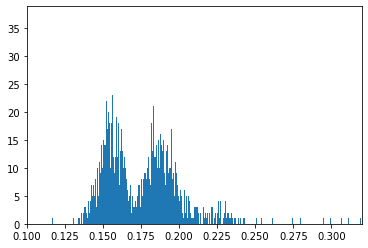

In [253]:
plt.hist(chlci, bins=2000)
plt.xlim(0.1,.32)

In [222]:
trios_gdf.iloc[:, 156:161].mean(axis=1).values

array([0.00719962, 0.00702049, 0.00608499, ..., 0.01105115, 0.00601578,
       0.00627533])

In [232]:
trios_gdf.iloc[:, 232:240].mean(axis=1).values

utc_dt
2021-08-27 13:11:50    0.004480
2021-08-27 13:12:00    0.004295
2021-08-27 13:12:10    0.003679
2021-08-27 13:12:20    0.006315
2021-08-27 13:12:30    0.004902
                         ...   
2021-08-27 21:23:00    0.003440
2021-08-27 21:23:10    0.004263
2021-08-27 21:23:20    0.008379
2021-08-27 21:23:30    0.003110
2021-08-27 21:23:40    0.003312
Length: 2919, dtype: float64

In [239]:
trios_gdf.iloc[:, 346:351].mean(axis=1).values

array([0.00259821, 0.00234837, 0.00205165, ..., 0.00616506, 0.00132067,
       0.0014643 ])

In [178]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=0).fit(trios_gdf.values[:,1:-4])

In [179]:
np.unique(kmeans.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int32),
 array([1581,    1,    4,   18,    2,   31,    1,    7,   15,    1,    3,
          48, 1190,   16,    1]))

In [258]:
trios_gdf['chl'] = chlci

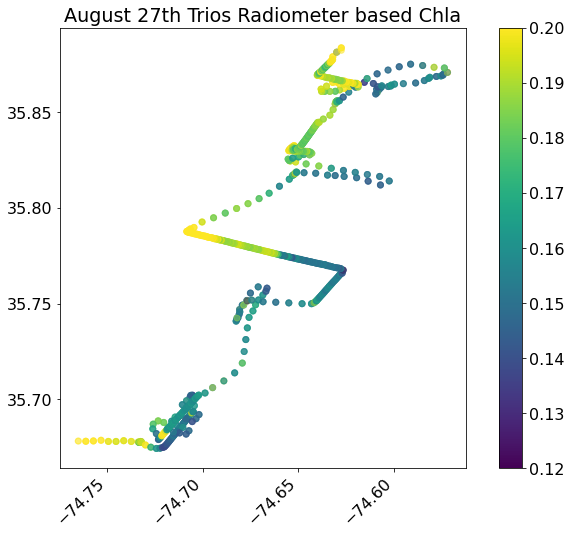

In [308]:
fig, ax = plt.subplots(figsize=(12,9))
sc = trios_gdf.plot('chl', ax=ax, vmin=.12,vmax=.20, cmap='viridis', alpha=0.3, label='CI Chla', legend=True)
# ss = ax.scatter(trios_gdf.lon, trios_gdf.lat, c=trios_gdf.chl, s=100)
# fig.colorbar(sc,ax=ax)
# fig.colorbar(sc, ax=ax)
fig.autofmt_xdate(rotation=45)
ax.set_title('August 27th Trios Radiometer based Chla')
fig.savefig('trios_radiometers_chlaci.png')

<AxesSubplot:>

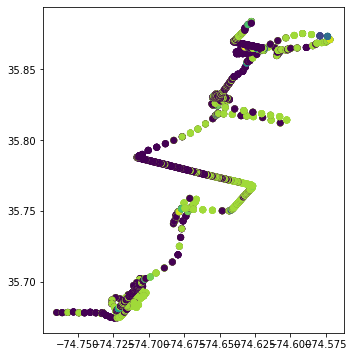

In [283]:
fig, ax = plt.subplots(figsize=(8,6))
trios_gdf.plot(c=kmeans.labels_,ax=ax)

In [310]:
trios_gdf_transect = trios_gdf.loc['2021-08-27 16:15:00':'2021-08-27 17:30:00']

In [379]:
x = trios_gdf_transect.rolling(window=6).mean().values[:,1:-5]

In [380]:
x = x[12:,:]

In [381]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [382]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [383]:
principalComponents.shape

(433, 2)

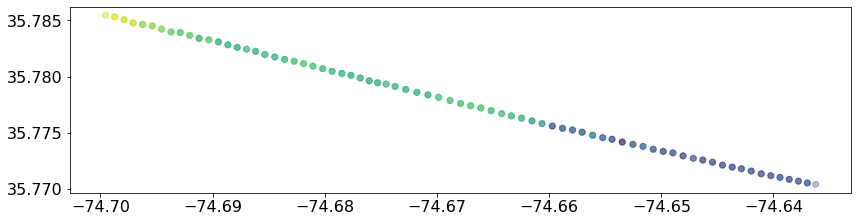

In [413]:
fig, ax = plt.subplots(figsize=(14,11))
trios_gdf_transect.iloc[12:].plot(c=trios_gdf_transect.iloc[12:].chl,ax=ax, alpha=0.2, vmin=0.2, vmax=.24)
fig.savefig('chla_transect.png')

In [ ]:
fig, ax = plt.subplots(figsize=(14,11))
trios_gdf_transect.iloc[12:].plot(c=trios_gdf_transect.iloc[12:].chl,ax=ax, alpha=0.2, vmin=0.2, vmax=.24)

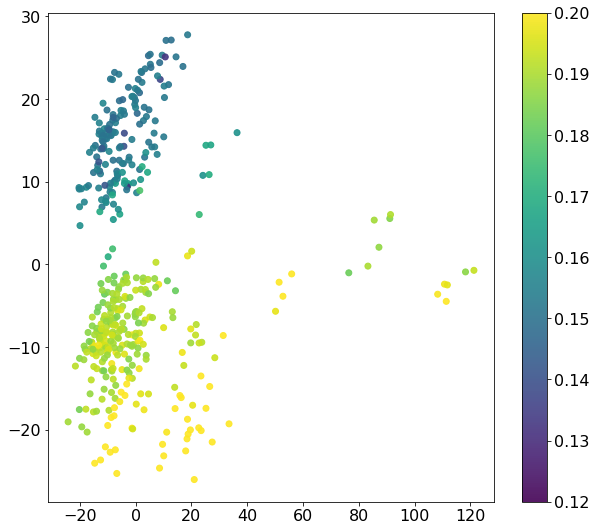

In [420]:
fig, ax = plt.subplots(figsize=(10,9))
sc = ax.scatter(principalComponents[:,0], principalComponents[:,1], alpha=0.9, c=trios_gdf_transect['chl'].iloc[12:], vmin=.12,vmax=.20, cmap='viridis', label='chla')
fig.colorbar(sc)
# ax.set_ylim(-3,2)
# ax.set_xlim(-6,8)
fig.savefig('pca_transect.png')

In [423]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(x)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 55, 210,  12,  44, 112]))

<AxesSubplot:>

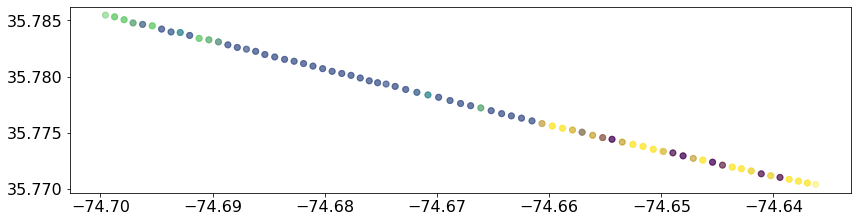

In [424]:
fig, ax = plt.subplots(figsize=(14,11))
trios_gdf_transect.iloc[12:].plot(c=kmeans.labels_,ax=ax, alpha=0.2)

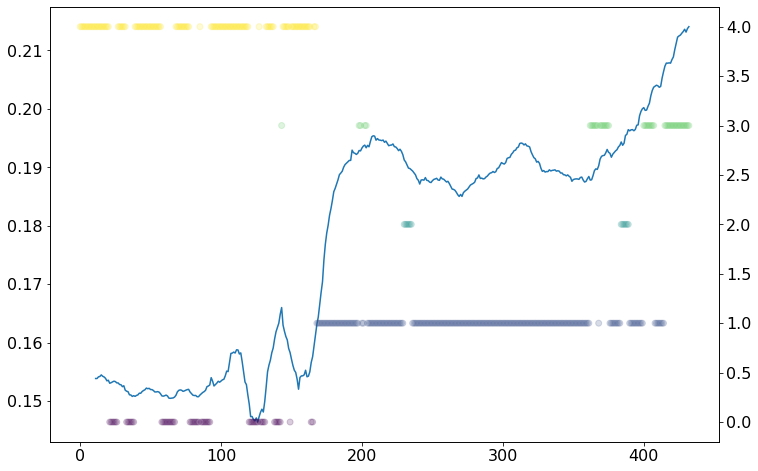

In [426]:
fig, ax  =plt.subplots(figsize=(12,8))
ax.plot(np.arange(0,len(x)),trios_gdf_transect.chl.iloc[12:].rolling(window=12).mean())
ax2=ax.twinx()
ax2.scatter(np.arange(0,len(x)), kmeans.labels_, alpha=0.2, c=kmeans.labels_)
fig.savefig('cluster_chla.png')

In [88]:
lats = []
lons = []
for i in range(len(trios_df_transect)):
    row = df_transect.iloc[df_transect.index.get_loc(pd.to_datetime(trios_df_transect.iloc[i].TimeStamp) + timedelta(hours=4), method='nearest')]
    lats.append(row.lat)
    lons.append(row.lon)

In [91]:
trios_df_transect['lat'] = lats
trios_df_transect['lon'] = lons

<ipython-input-91-aaa7d1eefef1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trios_df_transect['lat'] = lats
<ipython-input-91-aaa7d1eefef1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trios_df_transect['lon'] = lons


In [93]:
import geopandas as gpd

trios_gdf_transect = gpd.GeoDataFrame(
    trios_df_transect, geometry=gpd.points_from_xy(trios_df_transect.lon, trios_df_transect.lat))

<AxesSubplot:>

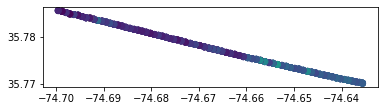

In [100]:
trios_gdf.plot('455')